In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\HP\Desktop\Projects\Datasets\ds_salaries.csv")

In [3]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
df.drop(df.columns[df.columns.str.contains('unnamed',case=False)],axis=1,inplace=True)

In [5]:
df.shape

(607, 11)

In [6]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [7]:
df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [8]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [9]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [10]:
import matplotlib.pyplot as plt

In [11]:
df.drop(['work_year','salary','salary_currency'],axis=1,inplace=True)

In [12]:
df.head()

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,MI,FT,Data Scientist,79833,DE,0,DE,L
1,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [13]:
df.shape

(607, 8)

In [14]:
df['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [15]:
df.duplicated().sum()

43

In [16]:
df.drop_duplicates()

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,MI,FT,Data Scientist,79833,DE,0,DE,L
1,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,SE,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...
602,SE,FT,Data Engineer,154000,US,100,US,M
603,SE,FT,Data Engineer,126000,US,100,US,M
604,SE,FT,Data Analyst,129000,US,0,US,M
605,SE,FT,Data Analyst,150000,US,100,US,M


In [17]:
df.reset_index(inplace=True)

In [18]:
df1=pd.DataFrame()
df1['job_title']=df['job_title']

In [19]:
a=df.groupby('job_title')['salary_in_usd'].mean()

In [20]:
df1=pd.merge(a,df1,on='job_title')

In [21]:
df1.head()

,job_title,salary_in_usd
0,3D Computer Vision Researcher,5409.000000
1,AI Scientist,66135.571429
2,AI Scientist,66135.571429
3,AI Scientist,66135.571429
4,AI Scientist,66135.571429


In [22]:
df1.drop_duplicates(inplace=True)

In [23]:
df1.shape

(50, 2)

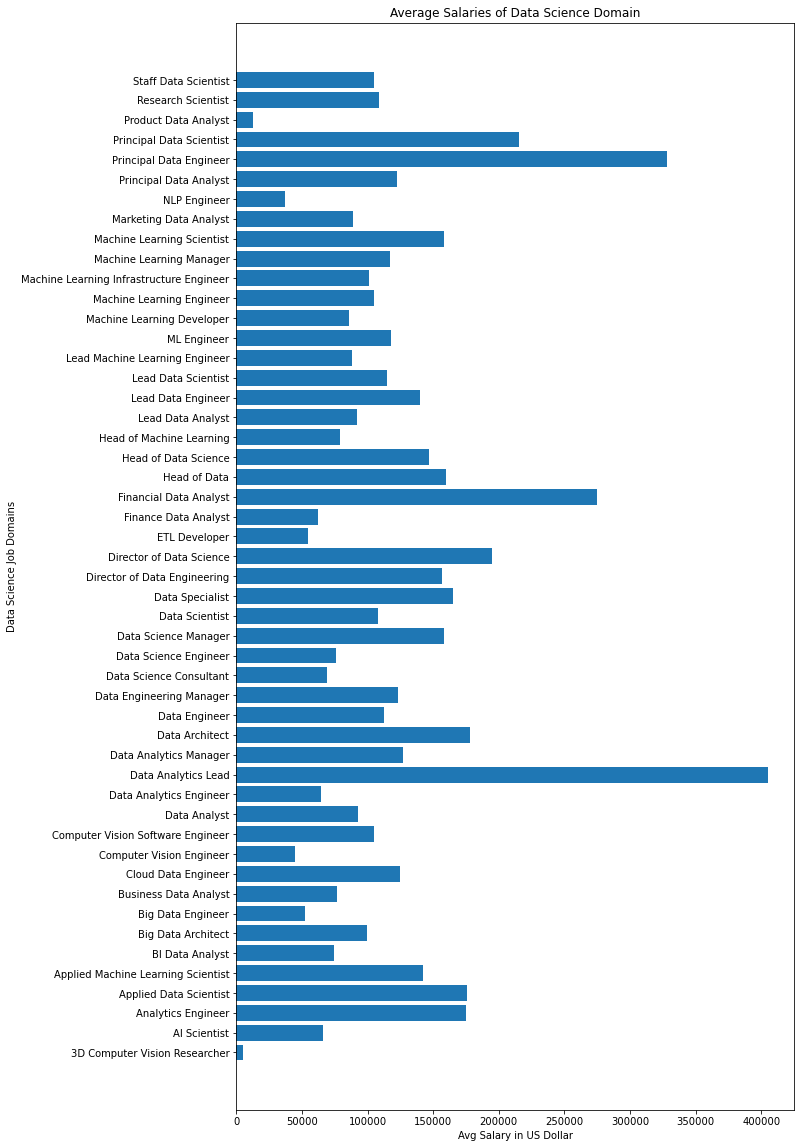

In [24]:
fig=plt.figure(figsize=(10,20))
plt.barh(df1['job_title'],df1['salary_in_usd'])
plt.title("Average Salaries of Data Science Domain")
plt.xlabel("Avg Salary in US Dollar")
plt.ylabel("Data Science Job Domains")
plt.show()

This bar graph shows that Data Analytics Lead has the highest mean salary in USD and 3D Computer Vision Researcher has the least mean salary in USD between the year 2020-2022 under the domain of Data Science.

In [25]:
df.columns

Index(['index', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [26]:
df.groupby('company_location')['job_title'].count()

company_location
AE      3
AS      1
AT      4
AU      3
BE      2
BR      3
CA     30
CH      2
CL      1
CN      2
CO      1
CZ      2
DE     28
DK      3
DZ      1
EE      1
ES     14
FR     15
GB     47
GR     11
HN      1
HR      1
HU      1
IE      1
IL      1
IN     24
IQ      1
IR      1
IT      2
JP      6
KE      1
LU      3
MD      1
MT      1
MX      3
MY      1
NG      2
NL      4
NZ      1
PK      3
PL      4
PT      4
RO      1
RU      2
SG      1
SI      2
TR      3
UA      1
US    355
VN      1
Name: job_title, dtype: int64

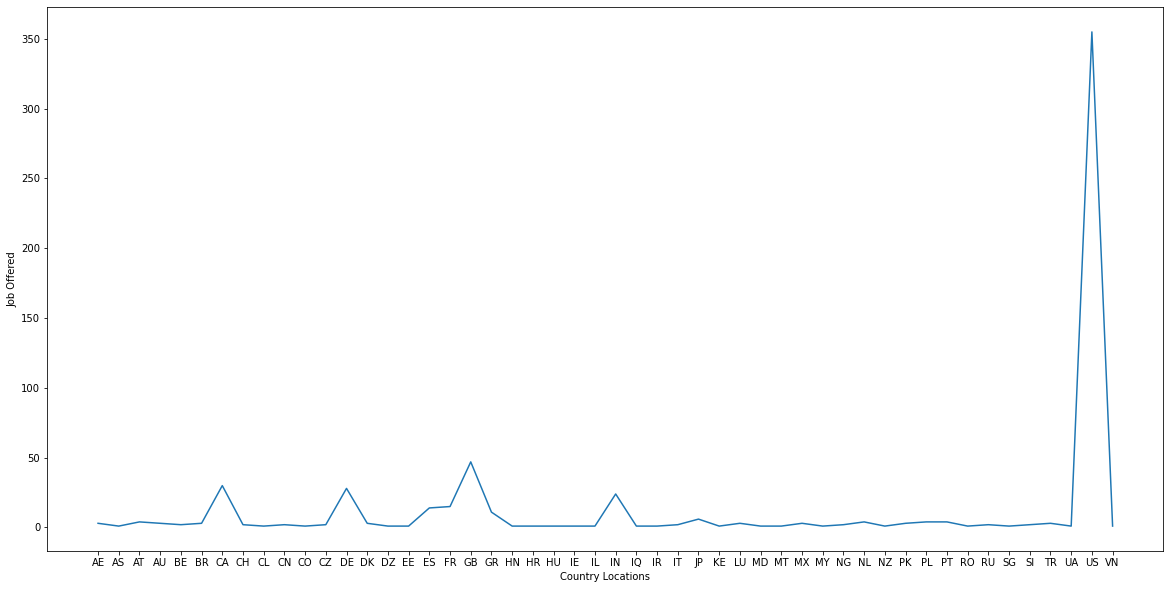

In [27]:
f=plt.figure(figsize=(20,10))
plt.plot(df.groupby('company_location')['job_title'].count())
plt.xlabel('Country Locations')
plt.ylabel('Job Offered')
plt.show()

This line graph shows that almost all the significant Data Science jobs are offered in United States(US). 

In [28]:
df.loc[df['remote_ratio']>=50,['job_title']].drop_duplicates().shape

(48, 1)

From this, we can conclude that most of the Data Science Jobs can be done on a remote basis,i.e., without going to the specified office location and working from home.

In [29]:
x=df['employment_type'].value_counts()

In [30]:
x

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

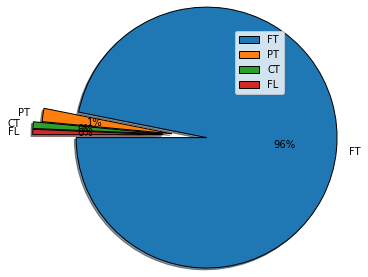

In [31]:
plt.pie(x.values,labels=x.index,startangle=180,radius=1.5,wedgeprops={'edgecolor':'black'},shadow=True,autopct='%d%%',explode=[0.3,0.1,0.2,0.2])
plt.legend()


In [32]:
print("Most of the Jobs are Full Time")

Most of the Jobs are Full Time


<AxesSubplot:>

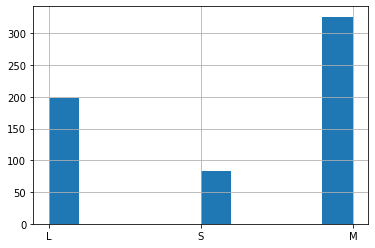

In [33]:
df['company_size'].hist()

In [34]:
import seaborn as sns

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='company_size', ylabel='salary_in_usd'>

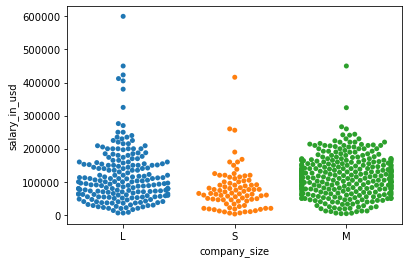

In [35]:
sns.swarmplot(x='company_size',y='salary_in_usd',data=df)

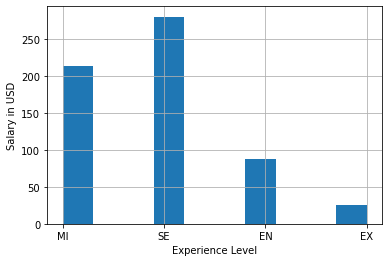

In [36]:
df['experience_level'].hist()
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='experience_level', ylabel='salary_in_usd'>

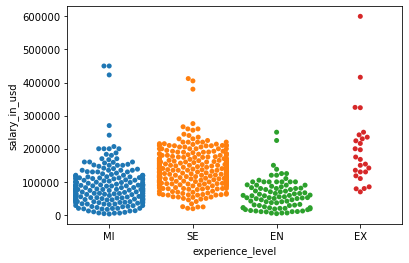

In [37]:
sns.swarmplot(x='experience_level',y='salary_in_usd',data=df)

The above two graphs shows that it is not necessary that a person will only get a good salary if he/she works in a big company or at a higher position. The Salary in the field of Data Science depends upon the quality of work the employee brings to the table for the company no matter whether a company is big,small or medium.

In [38]:
y=df['job_title'].value_counts()

In [39]:
y

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Machine Learning Scientist                    8
Big Data Engineer                             8
Director of Data Science                      7
Data Analytics Manager                        7
Data Science Consultant                       7
AI Scientist                                  7
Principal Data Scientist                      7
BI Data Analyst                               6
Lead Data Engineer                            6
Computer Vision Engineer                      6
ML Engineer                                   6
Head of Data                                  5
Business Data Analyst                         5
Data Engineering Manager                

In [40]:
y=y[y.values>10]

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

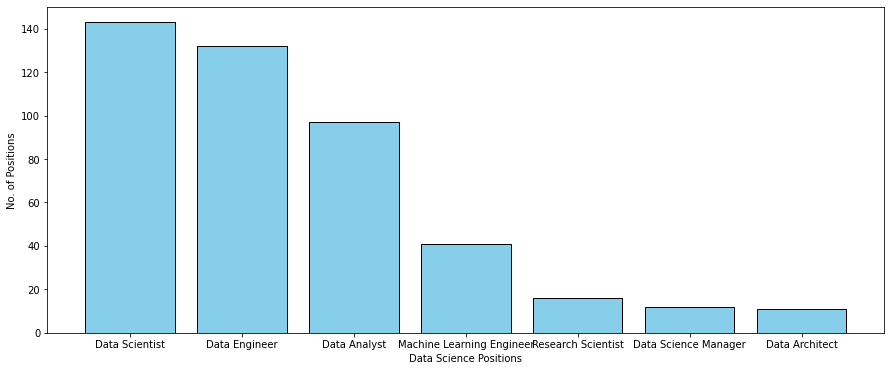

In [41]:
plt.figure(figsize=(15,6))
plt.bar(y.index,y.values,color='skyblue',edgecolor='black')
plt.xlabel('Data Science Positions')
plt.ylabel('No. of Positions')
plt.title

Most popular positions in the field of Data Science are Data Scientist, Data Engineer and Data Analyst.

In [42]:
df.loc[df['employee_residence']!=df['company_location']]

,index,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
17,17,SE,FT,Big Data Engineer,114047,PL,100,GB,S
19,19,MI,FT,Lead Data Engineer,56000,PT,100,US,M
32,32,SE,FT,Data Scientist,68428,GR,100,US,L
40,40,MI,FT,Data Scientist,45760,PH,100,US,S
53,53,EN,FT,Data Engineer,54742,PK,100,DE,L
54,54,SE,FL,Computer Vision Engineer,60000,RU,100,US,S
61,61,MI,FT,Data Engineer,130800,ES,100,US,M
70,70,MI,FT,Data Scientist,62726,FR,50,LU,S
73,73,EX,FT,BI Data Analyst,150000,IN,100,US,L
82,82,MI,FT,Applied Data Scientist,54238,GB,50,CA,L


In [43]:
df.loc[df['employee_residence']!=df['company_location']].shape

(51, 9)

In [44]:
print((51/607)*100,'% have to relocate for their jobs')

8.40197693574959 % have to relocate for their jobs


In [45]:
b=df.groupby('job_title')['salary_in_usd'].median()

In [46]:
df2=pd.DataFrame()
df2['job_title']=df['job_title']
df2=pd.merge(df2,b,on='job_title')

In [47]:
df2.head()

,job_title,salary_in_usd
0,Data Scientist,103691.0
1,Data Scientist,103691.0
2,Data Scientist,103691.0
3,Data Scientist,103691.0
4,Data Scientist,103691.0


In [48]:
df2.drop_duplicates(inplace=True)

In [49]:
df2.head()

,job_title,salary_in_usd
0,Data Scientist,103691.0
143,Machine Learning Scientist,156500.0
151,Big Data Engineer,41305.5
159,Product Data Analyst,13036.0
161,Machine Learning Engineer,87932.0


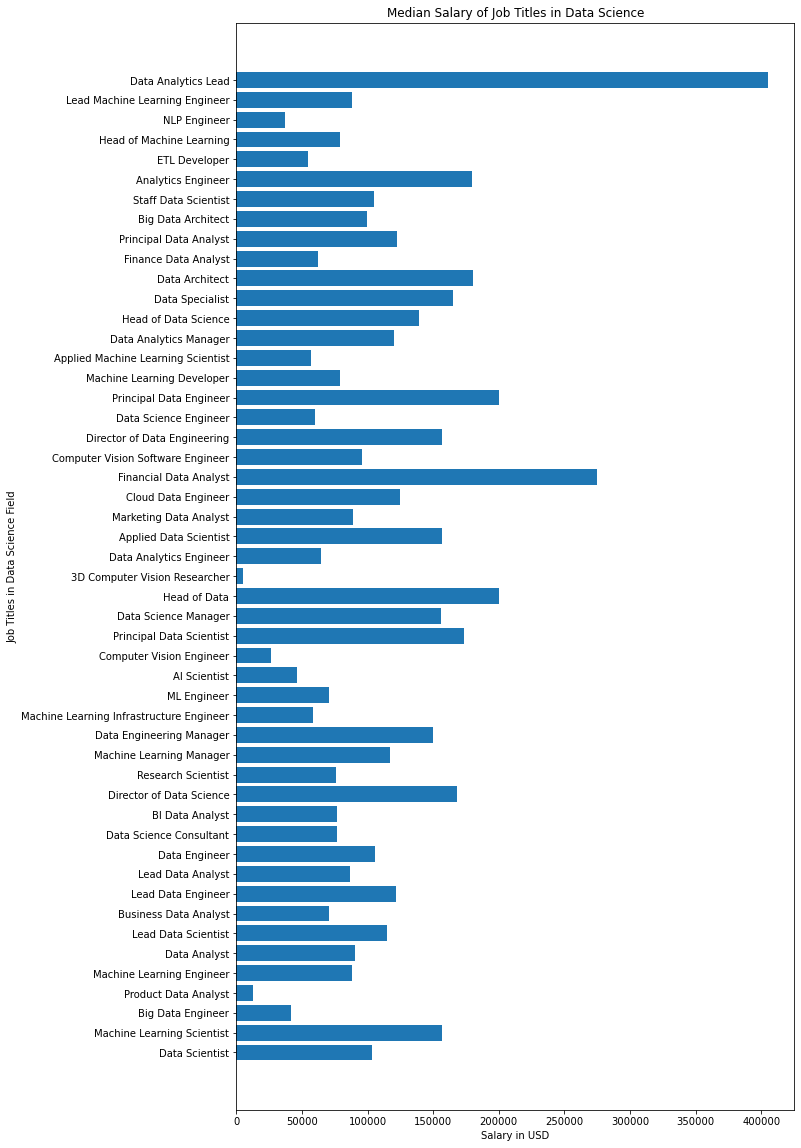

In [50]:
plt.figure(figsize=(10,20))
plt.barh(df2['job_title'],df2['salary_in_usd'])
plt.xlabel('Salary in USD')
plt.ylabel('Job Titles in Data Science Field')
plt.title('Median Salary of Job Titles in Data Science')
plt.show()

With the above graph, we get to know that a Data Analytics Lead has the highest median salary and 3D Computer Vision Researcher has the lowest median salary same as the average salary in the field of Data Science